In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape :", test.shape)
train.head()

Train shape: (891, 12)
Test shape : (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Missing values in train:")
print(train.isnull().sum())

print("\nMissing values in test:")
print(test.isnull().sum())

Missing values in train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
print("TRAIN PREVIEW:")
print(train.head())

print("\nTEST PREVIEW:")
print(test.head())

print("\nMissing values in TRAIN:")
print(train.isnull().sum())

print("\nMissing values in TEST:")
print(test.isnull().sum())
print("\nData types after cleaning:")
print(train.dtypes)

TRAIN PREVIEW:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

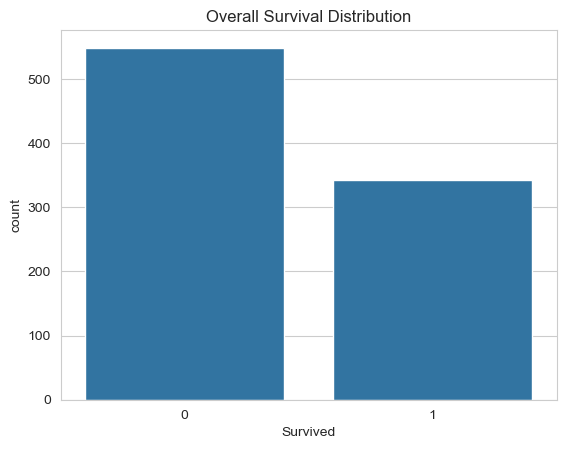

In [26]:
sns.countplot(x='Survived', data=train)
plt.title("Overall Survival Distribution")
plt.show()

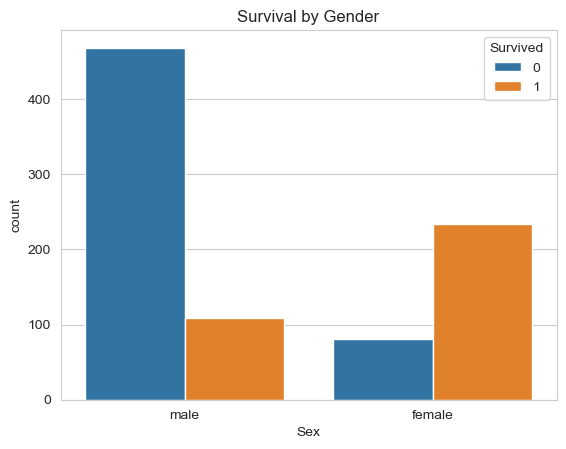

In [15]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Gender")
plt.show()

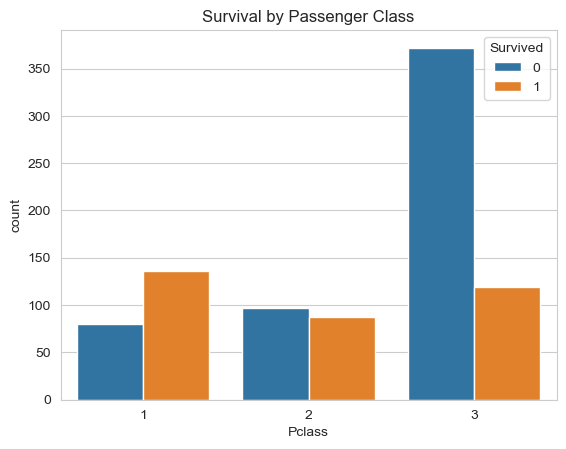

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

In [19]:
surv_group = train.groupby(['Pclass','Sex'])['Survived'].mean().unstack()
print(surv_group)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


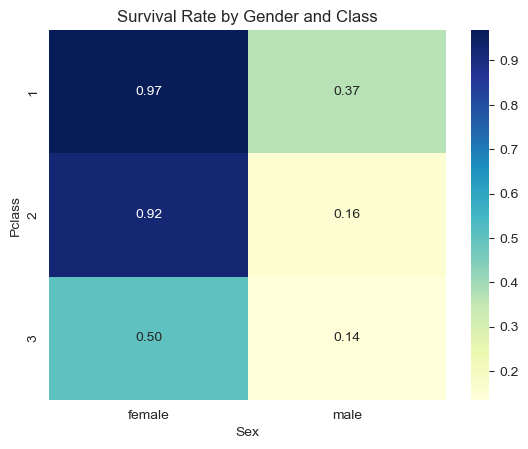

In [21]:
sns.heatmap(surv_group, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rate by Gender and Class")
plt.show()

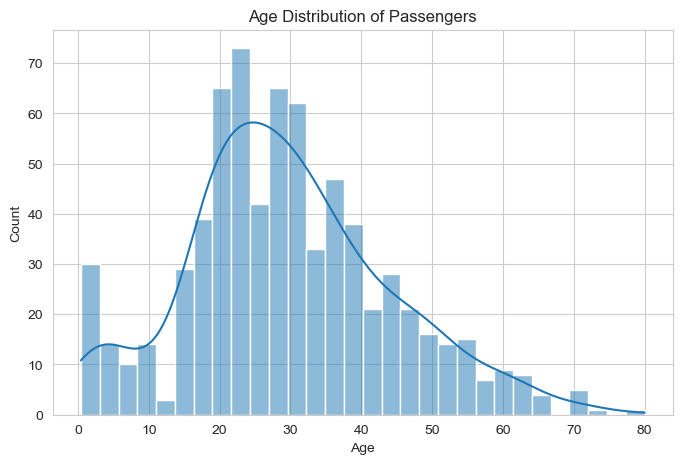

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

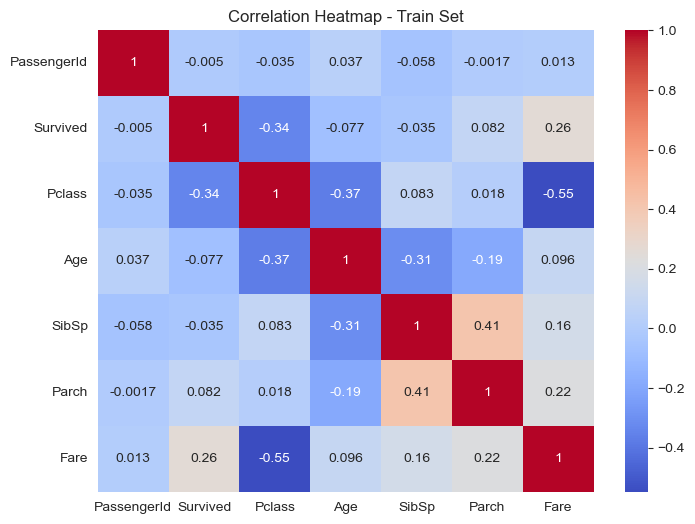

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Train Set")
plt.show()

In [13]:
print("Train dtypes:\n", train.dtypes)
print("\nTest dtypes:\n", test.dtypes)

print("\nUnique values check:")
for col in ['Pclass','Sex','Embarked']:
    if col in train.columns and col in test.columns:
        print(f"{col} -> Train: {train[col].unique()} | Test: {test[col].unique()}")

Train dtypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Test dtypes:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Unique values check:
Pclass -> Train: [3 1 2] | Test: [3 2 1]
Sex -> Train: ['male' 'female'] | Test: ['male' 'female']
Embarked -> Train: ['S' 'C' 'Q' nan] | Test: ['Q' 'S' 'C']
